In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/',one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
(data.train.labels[0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [4]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [5]:
data.test.cls

array([7, 2, 1, ..., 4, 5, 6])

In [6]:
data.test.cls

array([7, 2, 1, ..., 4, 5, 6])

In [7]:
img_size = 28
img_flat = img_size*img_size
img_shape = (img_size,img_size)
n_cls = 10

In [8]:
def plot_img(images,cls_true,cls_pred=None):
    assert len(images)==len(cls_true)==16
    fig, axes = plt.subplots(4,4)
    fig.subplots_adjust(hspace=0.4,wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape),cmap='binary')
        if cls_pred!=None:
            xlabel = 'True: {0}, Pred: {1}'.format(cls_true[i],cls_pred[i])
        else:
            xlabel = 'True: {0}'.format(cls_true[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

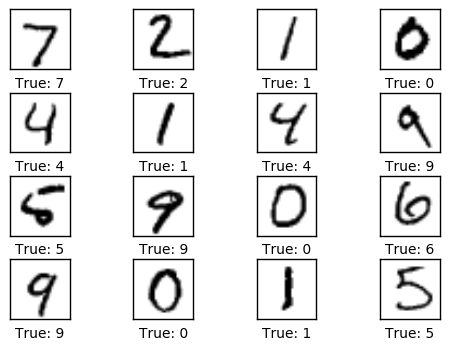

In [9]:
plot_img(data.test.images[0:16],data.test.cls[0:16])

In [10]:
x = tf.placeholder(tf.float32,[None,img_flat])

In [11]:
y_true = tf.placeholder(tf.float32,[None,n_cls])

In [12]:
y_true_cls = tf.placeholder(tf.int64,[None])

In [13]:
weights1 = tf.Variable(tf.random_normal([img_flat,300]))

In [14]:
biases1 = tf.Variable(tf.random_normal([300]))

In [15]:
weights2 = tf.Variable(tf.random_normal([300,100]))
biases2 = tf.Variable(tf.random_normal([100]))

In [16]:
weights3 = tf.Variable(tf.random_normal([100,n_cls]))
biases3 = tf.Variable(tf.random_normal([n_cls]))

In [17]:
def network(data):
    hd_layer1 = tf.matmul(data,weights1)+biases1
    hd_layer1 = tf.nn.sigmoid(hd_layer1)
    hd_layer2 = tf.matmul(hd_layer1,weights2)+biases2
    hd_layer2 = tf.nn.sigmoid(hd_layer2)
    logits = tf.matmul(hd_layer2,weights3)+biases3
    return logits

In [18]:
logits = network(x)

In [19]:
x.shape

TensorShape([Dimension(None), Dimension(784)])

In [20]:
weights1.shape

TensorShape([Dimension(784), Dimension(300)])

In [21]:
y_pred = tf.nn.softmax(logits)

In [22]:
y_pred_cls = tf.argmax(y_pred,dimension=1)

In [23]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

In [24]:
cost = tf.reduce_mean(cross_entropy)

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [26]:
correct_pred = tf.equal(y_pred_cls,y_true_cls)

In [27]:
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [28]:
session = tf.Session()

In [29]:
session.run(tf.global_variables_initializer())

In [30]:
mini_batch = 200

In [31]:
def optimize(num_iteration):
    for i in range(num_iteration):
        x_batch,y_true_batch = data.train.next_batch(mini_batch)
        feed_dict = {x:x_batch,y_true:y_true_batch}
        session.run(optimizer,feed_dict=feed_dict)

In [32]:
feed_dict_test = {x:data.test.images, y_true:data.test.labels, y_true_cls:data.test.cls}
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print "Test Accuracy: {0:.1%}".format(acc)

In [33]:
print_accuracy()

Test Accuracy: 10.7%


In [34]:
optimize(100)

In [35]:
print_accuracy()

Test Accuracy: 67.1%


In [36]:
def plot_weights():
    w = session.run(weights3)
    w_min = np.min(w)
    w_max = np.max(w)
    fig,axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    for i,ax in enumerate(axes.flat):
        if i<10:
            image = w[:,i].reshape(10,10)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [37]:
print_accuracy()

Test Accuracy: 67.1%


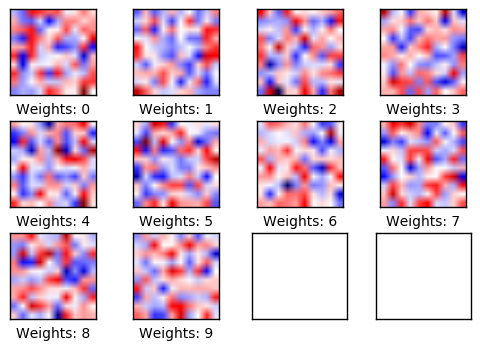

In [38]:
plot_weights()

In [39]:
optimize(1)

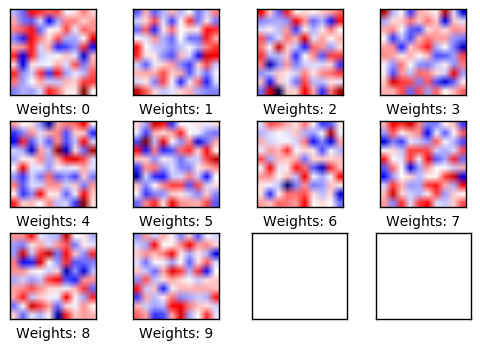

In [40]:
plot_weights()

In [41]:
print_accuracy()

Test Accuracy: 67.9%


In [42]:
optimize(5)

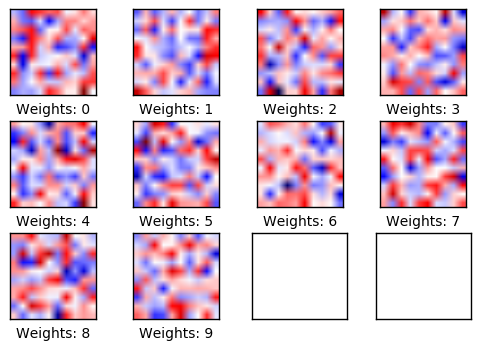

In [43]:
plot_weights()

In [44]:
optimize(10)

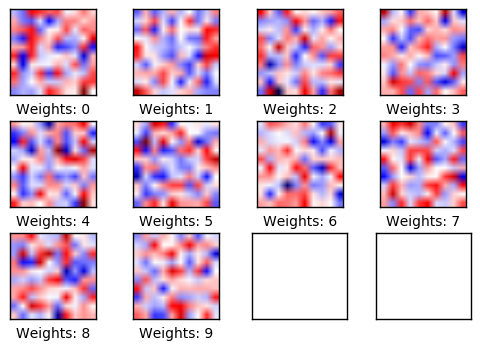

In [45]:
plot_weights()

In [46]:
print_accuracy()

Test Accuracy: 69.5%


In [47]:
optimize(1000)

In [48]:
print_accuracy()

Test Accuracy: 88.5%


In [49]:
def plot_example_error():
    correct,cls_pred = session.run([correct_pred,y_pred_cls],feed_dict=feed_dict_test)
    incorrect = (correct==False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_img(images=images[0:16],cls_true=cls_true[0:16],cls_pred=cls_pred[0:16])

/home/greatskull/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


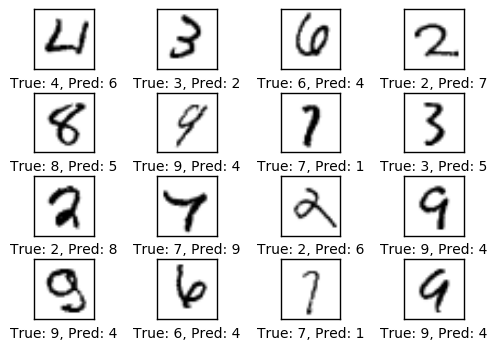

In [50]:
plot_example_error()

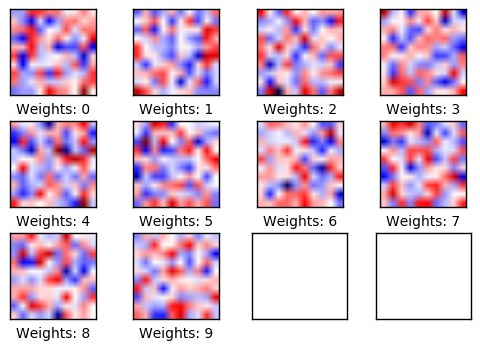

In [51]:
plot_weights()

In [52]:
optimize(1000)

In [53]:
print_accuracy()

Test Accuracy: 90.9%


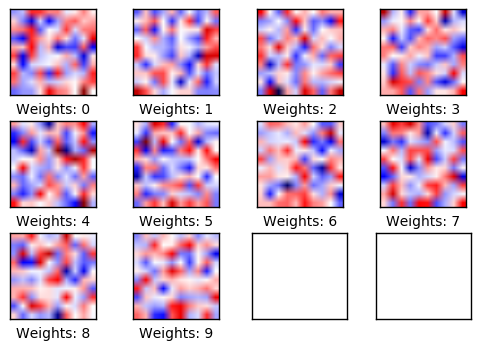

In [54]:
plot_weights()